In [1]:
import nltk 
nltk.download('punkt')
nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_ru')
nltk.download('wordnet31')

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data] Downloading package wordnet31 to /usr/share/nltk_data...


In [81]:
import os
import pandas as pd
df = pd.read_csv(r"/kaggle/input/task2-subset-duplicates-removed/Task2 No Duplicates/OD-noDuplicates.csv")
df = df[df['QueryType'].isin(['Cultural Practices'])]
df.head()

/tmp/ipykernel_33/4080700301.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"/kaggle/input/task2-subset-duplicates-removed/Task2 No Duplicates/OD-noDuplicates.csv")


,BlockName,Category,Year,Month,Day,Crop,DistrictName,QueryType,Season,Sector,StateName,QueryText,KccAns
362,0,0,2009,11,30,Groundnut pea nutmung phalli,BALASORE,Cultural Practices,KHARIF,AGRICULTURE,ODISHA,FERTILISER MANAGEMENT IN GROUNDNUT,APPLY NPK10-26-26 60KGUREA-5KGACRE
366,0,0,2009,12,6,1266,BALASORE,Cultural Practices,NaN,825,ODISHA,LOANS SUBSIDIES IN POULTRY FARMING,ANSWER GIVEN IN DETAILS CONTACT TO VS
393,0,0,2009,12,26,Lemon,BALASORE,Cultural Practices,KHARIF,HORTICULTURE,ODISHA,DOSE OF PLANOFIX,1ML45LIT OF WATER
2060,0,0,2009,11,3,1296,KENDRAPARA,Cultural Practices,KHARIF,HORTICULTURE,ODISHA,TUBER SEEDS TREATMENT OF POTATO,TREATED WITH MANCOZEB 3GMLIT OF WATER
2572,0,0,2009,12,9,1137,BARGARH,Cultural Practices,NaN,AGRICULTURE,ODISHA,SEED TREATMENT OF PADDY,CAPTAN 3GMKG


In [69]:
num_null_values = df['Year'].isnull().sum()

print("Number of null values in the 'Year' column:", num_null_values)

# import numpy as np

# # Select a random example where the year is null
# random_example_null_year = df[df['Year'].isnull()].sample(n=5, random_state=42)

# print("Random example where the year is null:")
# print(random_example_null_year)


Number of null values in the 'Year' column: 0


In [70]:
df=df.dropna()

num_null_values = df['Year'].isnull().sum()

print("Number of null values in the 'Year' column:", num_null_values)

case_counts = df.groupby('Year').size().reset_index(name='Number_of_Cases')

print("Number of cases in each year:")
print(case_counts)

Number of null values in the 'Year' column: 0
Number of cases in each year:
   Year  Number_of_Cases
0  2009              270
1  2010              708
2  2011              212
3  2012               40
4  2013              455
5  2014             1958
6  2015             8362
7  2016             7874
8  2017             4120
9  2018            10773


In [71]:
papers=df
import re
# Remove punctuation
df['paper_text_processed'] = \
df['QueryText'].map(lambda x: re.sub('[,\.!?]', '', x))
df['paper_text_processed'] = \
df['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['paper_text_processed'].head()


1            hybrid varities of sunflower
26                      aphids in mustard
27                    aphids in sunflower
51    larger cabbage moth pest of mustard
61              use of boron in sunflower
Name: paper_text_processed, dtype: object

In [25]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['fertilizer', 'management', 'groundnut']


In [26]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [27]:
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=dictionary,
#                                            num_topics=k, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v',processes=5)
    
#     return coherence_model_lda.get_coherence()

# import numpy as np
# import tqdm

# grid = {}
# grid['Validation_Set'] = {}

# # Topics range
# min_topics = 5
# max_topics = 8
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# # Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.45))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# # Beta parameter
# beta = list(np.arange(0.01, 1, 0.45))
# beta.append('symmetric')

# num_of_docs = len(corpus)
# corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
#                corpus]

# corpus_title = ['75% Corpus', '100% Corpus']
# print(len(alpha))
# print(len(beta))

# model_results = {
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# if 1 == 1:
#     pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)))
    

#     for k in topics_range:
#         # iterate through alpha values
#         for a in alpha:
#             # iterare through beta values
#             for b in beta:
#                 # get the coherence score for the given parameters
#                 cv = compute_coherence_values(corpus=corpus, dictionary=id2word, 
#                                               k=k, a=a, b=b)
#                 model_results['Topics'].append(k)
#                 model_results['Alpha'].append(a)
#                 model_results['Beta'].append(b)
#                 model_results['Coherence'].append(cv)

#                 pbar.update(1)
#     pd.DataFrame(model_results).to_csv('/kaggle/working/hyper.csv', index=False)
#     pbar.close()

In [28]:
model_filepath = "/kaggle/working/lda_model"

from pprint import pprint

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=100,
                                       passes=8,
                                       alpha=0.46,
                                       eta=0.91)

lda_model.save(model_filepath)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.181*"asked" + 0.129*"basal" + 0.099*"gram" + 0.080*"black" + '
  '0.062*"onion" + 0.046*"tomato" + 0.035*"blackgram" + 0.030*"bhendi" + '
  '0.014*"blotch" + 0.013*"weed"'),
 (1,
  '0.142*"ton" + 0.119*"cot" + 0.107*"coconut" + 0.062*"flower" + '
  '0.043*"banana" + 0.035*"fruit" + 0.029*"th" + 0.024*"grow" + 0.023*"drop" + '
  '0.023*"shed"'),
 (2,
  '0.151*"foliar" + 0.102*"application" + 0.096*"spray" + 0.055*"leaf" + '
  '0.042*"nutrient" + 0.037*"brinjal" + 0.035*"jasmine" + 0.034*"season" + '
  '0.033*"wea" + 0.032*"report"'),
 (3,
  '0.057*"details" + 0.052*"asking" + 0.045*"contact" + 0.041*"information" + '
  '0.037*"number" + 0.029*"subsidy" + 0.027*"deficiency" + 0.025*"department" '
  '+ 0.023*"chilli" + 0.020*"availabilitrey"'),
 (4,
  '0.274*"fertilizer" + 0.247*"management" + 0.155*"top" + 0.120*"dressing" + '
  '0.033*"maize" + 0.033*"groundnut" + 0.026*"sugarcane" + 0.021*"gourd" + '
  '0.014*"tapioca" + 0.008*"bitter"'),
 (5,
  '0.457*"asking" + 0.190*"paddy

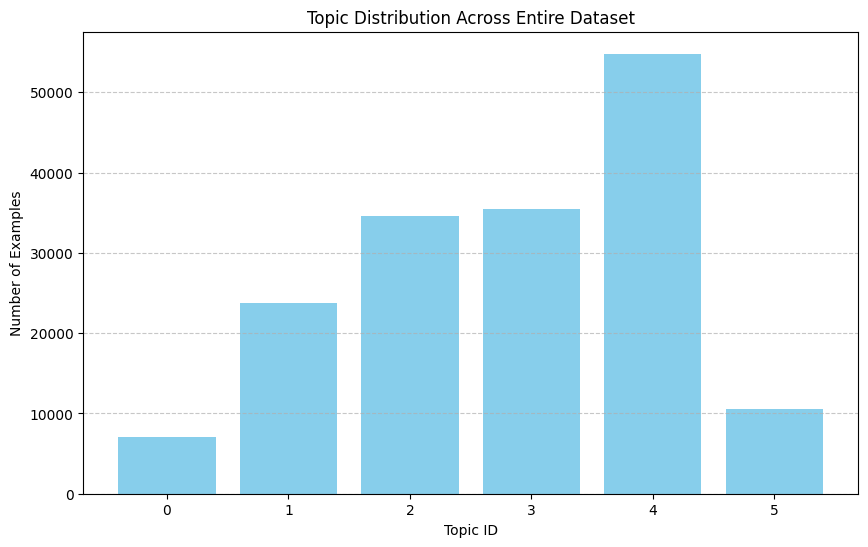

In [29]:
import matplotlib.pyplot as plt

topic_counts = {}

for example_id, example in enumerate(corpus):
    topic_distribution = lda_model[example]
    
    for topic_id, topic_prob in topic_distribution:
        if topic_prob>0.5:
            if topic_id not in topic_counts:
                topic_counts[topic_id] = 1
            else:
                topic_counts[topic_id] += 1

topics = list(topic_counts.keys())
counts = list(topic_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(topics, counts, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Number of Examples')
plt.title('Topic Distribution Across Entire Dataset')
plt.xticks(topics)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

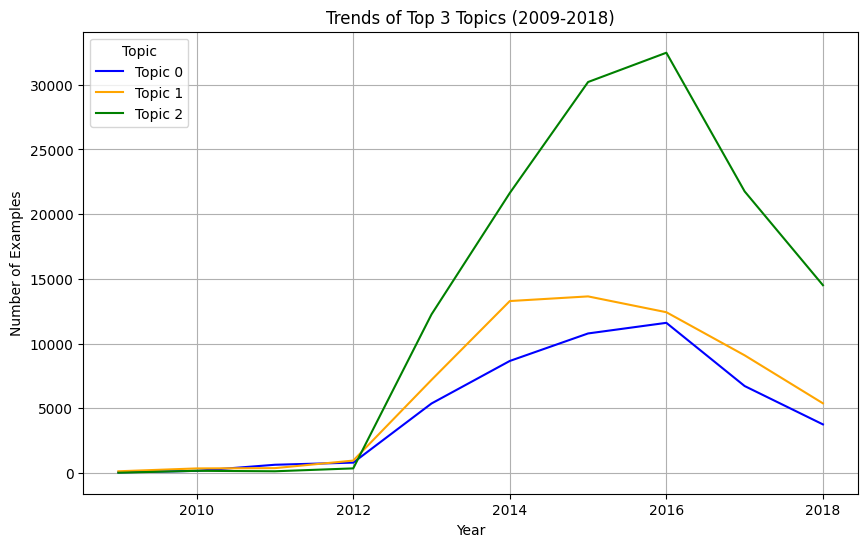

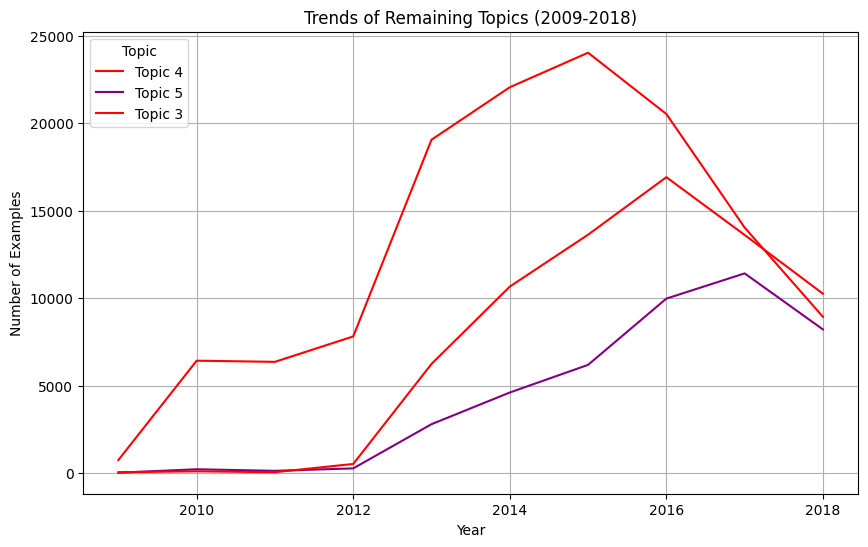

In [30]:
import matplotlib.pyplot as plt
from itertools import cycle

# Initialize a dictionary to store the topic counts for each year
yearly_topic_counts = {}
num_topics = 6

# Define the starting and ending years
start_year = 2009
end_year = 2018

# Initialize yearly topic counts for each year and each topic
for year in range(start_year, end_year + 1):
    yearly_topic_counts[year] = {topic: 0 for topic in range(num_topics)}

# Iterate over each example in the corpus
for index, (example, year) in enumerate(zip(corpus, df['Year'])):
    year = int(year)  # Convert year to integer

    # Check if the year is within our range
    if start_year <= year <= end_year:
        # Get the topic distribution for the example
        topic_distribution = lda_model[example]

        # Find the dominant topic for the example (topic with maximum probability)
        dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]

        # Update the topic counts dictionary for the corresponding year
        yearly_topic_counts[year][dominant_topic] += 1

# Plotting all topics over the years 2009-2018
# Since there are 5 topics, you can choose how to split them into two graphs.

# IDs for the topics can be adjusted as needed, here's a split example:
top_topics = [0, 1, 2]  # Topics for the first graph
remaining_topics = [ 4,5,3]  # Topics for the second graph

# First graph for top 3 topics
plt.figure(figsize=(10, 6))
color_palette = cycle(['blue', 'orange', 'green'])
for topic, color in zip(top_topics, color_palette):
    topic_counts = [yearly_topic_counts[year][topic] for year in range(start_year, end_year + 1)]
    plt.plot(range(start_year, end_year + 1), topic_counts, color=color, label=f'Topic {topic}')

plt.xlabel('Year')
plt.ylabel('Number of Examples')
plt.title('Trends of Top 3 Topics (2009-2018)')
plt.legend(title='Topic', loc='upper left')
plt.grid(True)
plt.show()

# Second graph for remaining topics
plt.figure(figsize=(10, 6))
color_palette = cycle(['red', 'purple'])
for topic, color in zip(remaining_topics, color_palette):
    topic_counts = [yearly_topic_counts[year][topic] for year in range(start_year, end_year + 1)]
    plt.plot(range(start_year, end_year + 1), topic_counts, color=color, label=f'Topic {topic}')

plt.xlabel('Year')
plt.ylabel('Number of Examples')
plt.title('Trends of Remaining Topics (2009-2018)')
plt.legend(title='Topic', loc='upper left')
plt.grid(True)
plt.show()


In [31]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.36677895651882925


In [32]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_uci')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  -5.904538936567877


In [33]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  -9.194808367590174


In [34]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/kaggle/working/'+str(7))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/kaggle/working/'+ str(7) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.248227  0.142814       1        1  21.007164
2     -0.277393 -0.165762       2        1  19.609569
5      0.253411 -0.088919       3        1  16.289080
3      0.032318 -0.294289       4        1  15.720864
1     -0.235024  0.190363       5        1  14.328501
0     -0.021539  0.215794       6        1  13.044823, topic_info=            Term           Freq          Total Category  logprob  loglift
134       asking  164216.000000  164216.000000  Default  30.0000  30.0000
0     fertilizer  114302.000000  114302.000000  Default  29.0000  29.0000
2     management  142134.000000  142134.000000  Default  28.0000  28.0000
9          paddy   61576.000000   61576.000000  Default  27.0000  27.0000
6            top   64689.000000   64689.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
1207        grub     901.293978     906.100053   Topic6  -5.6607   2.0315
1170       melon     854.638774     859.351746   Topic6  -5.7139   2.0313
604         dose    1078.702906    1084.829785   Topic6  -5.4810   2.0311
262         seed    2799.134240    4296.523854   Topic6  -4.5275   1.6083
2     management    3313.795676  142134.397256   Topic6  -4.3587  -1.7219

[234 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
239       1  0.000792   acre
239       2  0.000792   acre
239       3  0.000792   acre
239       4  0.000792   acre
239       5  0.000792   acre
...     ...       ...    ...
469       2  0.000452  yield
469       3  0.000452  yield
469       4  0.095339  yield
469       5  0.902329  yield
469       6  0.000904  yield

[1206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 6, 4, 2, 1])